<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/Linear%20Regression/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

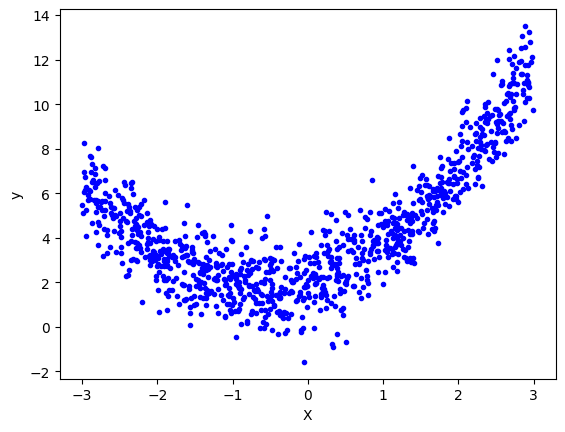

In [4]:
x=6*np.random.rand(1000,1)-3
y=0.8 * x**2 + 0.9 * x + 2 + np.random.randn(1000, 1)
plt.plot(x, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

r2 score -> 0.27964264923923254


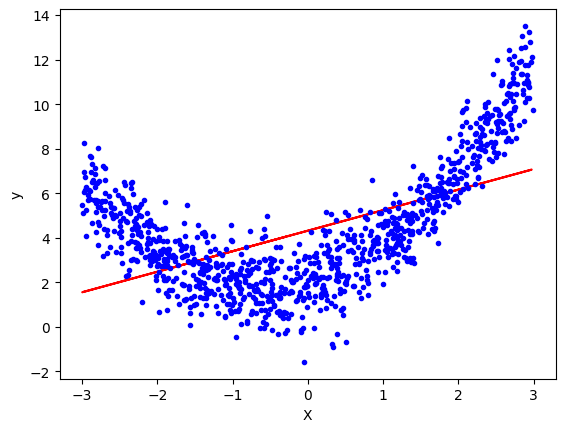

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2 score ->',r2_score(y_test,y_pred))

plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Use Polynomial Regression

*What is PolynomialFeatures?*

It’s a function from scikit-learn (from sklearn.preprocessing import PolynomialFeatures) that creates new polynomial features from your original features.

degree=2
Means you are creating polynomial terms up to power 2 (squared).
If your original feature is x, it will create:

1 (bias term, if include_bias=True)

𝑥 (original feature)

𝑥
2
 (squared feature)

👉 For multiple features (say x1, x2), it also adds interaction terms:

𝑥
1,
𝑥
2
,
𝑥
1
2
,
𝑥
2
2
,
𝑥
1
⋅
𝑥
2

include_bias=True
Adds a column of all 1’s (bias term) → used for the intercept in regression.
If set to False, it will not add this constant.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score -> 0.8450346236784557


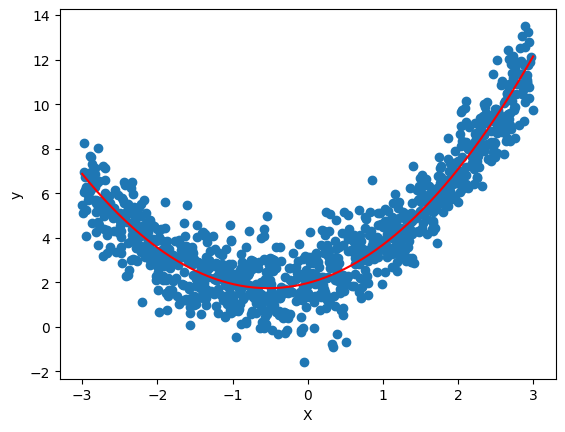

In [11]:
poly=PolynomialFeatures(degree=2)
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)

lr=SGDRegressor(max_iter=100)
lr.fit(x_train_trans,y_train)
y_pred=lr.predict(x_test_trans)
print('r2 score ->',r2_score(y_test,y_pred))

x_new=np.linspace(-3, 3, 500).reshape(500, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

plt.plot(x_new,y_new,color='r')
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [26]:
import plotly.express as px

# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [28]:
import plotly.graph_objects as go

lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))
fig.show()